In [1]:
import numpy as np
import pandas as pd

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
df = pd.read_csv('/content/drive/MyDrive/Datascience/tokyo_weather_2020.csv')
df

,年,月,日,曜日,平均気温,最高気温,最低気温,降水量,日照時間,平均風速,風向,平均湿度,天気概況_昼,天気概況_夜
0,2020,1,1,水,5.5,10.2,3.2,0.0,7.4,2.6,北北西,49,晴,快晴
1,2020,1,2,木,6.2,11.3,1.9,0.0,5.7,1.8,北,60,晴一時曇,晴
2,2020,1,3,金,6.1,12.0,1.4,0.0,8.8,1.4,北西,63,快晴,快晴
3,2020,1,4,土,7.2,12.2,3.6,0.0,3.4,2.3,北北西,53,曇時々晴,晴一時雨、みぞれを伴う
4,2020,1,5,日,5.4,10.2,0.6,1.0,8.9,3.0,北西,61,快晴,快晴
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020,12,27,日,7.8,12.7,3.4,0.0,6.8,1.9,北北西,59,曇後晴,曇一時晴
362,2020,12,28,月,8.5,13.5,6.2,0.0,4.0,1.6,北北西,72,曇後晴,快晴
363,2020,12,29,火,8.7,13.1,4.3,0.0,4.5,1.6,北北東,66,薄曇一時晴,晴時々薄曇
364,2020,12,30,水,6.9,12.3,2.7,1.5,1.6,3.4,北北西,68,曇一時雨,晴時々曇


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   年       366 non-null    int64  
 1   月       366 non-null    int64  
 2   日       366 non-null    int64  
 3   曜日      366 non-null    object 
 4   平均気温    366 non-null    float64
 5   最高気温    366 non-null    float64
 6   最低気温    366 non-null    float64
 7   降水量     366 non-null    float64
 8   日照時間    366 non-null    float64
 9   平均風速    366 non-null    float64
 10  風向      366 non-null    object 
 11  平均湿度    366 non-null    int64  
 12  天気概況_昼  366 non-null    object 
 13  天気概況_夜  366 non-null    object 
dtypes: float64(6), int64(4), object(4)
memory usage: 40.2+ KB


In [14]:
df['風向'].value_counts()

風向
北北西    84
南      66
北西     60
南南東    42
北東     24
南東     23
北      18
北北東    16
東北東    11
南南西     8
西北西     7
東       7
Name: count, dtype: int64

In [15]:
df['風向'].value_counts(sort=False)

風向
北北西    84
北      18
北西     60
北北東    16
南東     23
南南東    42
南南西     8
南      66
東北東    11
西北西     7
北東     24
東       7
Name: count, dtype: int64

In [16]:
df['風向'].value_counts(normalize=True)

風向
北北西    0.229508
南      0.180328
北西     0.163934
南南東    0.114754
北東     0.065574
南東     0.062842
北      0.049180
北北東    0.043716
東北東    0.030055
南南西    0.021858
西北西    0.019126
東      0.019126
Name: proportion, dtype: float64

In [17]:
df.filter(items=['天気概況_昼', '天気概況_夜']).apply(pd.Series.value_counts)

,天気概況_昼,天気概況_夜
大雨,5.0,4.0
快晴,32.0,40.0
晴,59.0,30.0
晴、雷を伴う,1.0,NaN
晴一時曇,16.0,15.0
...,...,...
雨時々みぞれ一時雪,1.0,1.0
雨時々曇,15.0,18.0
雨時々曇、雷を伴う,NaN,1.0
雨時々曇後晴,NaN,4.0


In [18]:
pd.cut(df['平均気温'], bins=5)

0      (2.371, 8.26]
1      (2.371, 8.26]
2      (2.371, 8.26]
3      (2.371, 8.26]
4      (2.371, 8.26]
           ...      
361    (2.371, 8.26]
362    (8.26, 14.12]
363    (8.26, 14.12]
364    (2.371, 8.26]
365    (2.371, 8.26]
Name: 平均気温, Length: 366, dtype: category
Categories (5, interval[float64, right]): [(2.371, 8.26] < (8.26, 14.12] < (14.12, 19.98] <
                                           (19.98, 25.84] < (25.84, 31.7]]

In [19]:
pd.cut(df['平均気温'], bins=5, right=False)

0        [2.4, 8.26)
1        [2.4, 8.26)
2        [2.4, 8.26)
3        [2.4, 8.26)
4        [2.4, 8.26)
           ...      
361      [2.4, 8.26)
362    [8.26, 14.12)
363    [8.26, 14.12)
364      [2.4, 8.26)
365      [2.4, 8.26)
Name: 平均気温, Length: 366, dtype: category
Categories (5, interval[float64, left]): [[2.4, 8.26) < [8.26, 14.12) < [14.12, 19.98) <
                                          [19.98, 25.84) < [25.84, 31.729)]

In [20]:
pd.cut(df['平均気温'], bins=5, right=False, labels=False)

0      0
1      0
2      0
3      0
4      0
      ..
361    0
362    1
363    1
364    0
365    0
Name: 平均気温, Length: 366, dtype: int64

In [21]:
pd.qcut(df['平均気温'], q=4)

0      (2.399, 9.9]
1      (2.399, 9.9]
2      (2.399, 9.9]
3      (2.399, 9.9]
4      (2.399, 9.9]
           ...     
361    (2.399, 9.9]
362    (2.399, 9.9]
363    (2.399, 9.9]
364    (2.399, 9.9]
365    (2.399, 9.9]
Name: 平均気温, Length: 366, dtype: category
Categories (4, interval[float64, right]): [(2.399, 9.9] < (9.9, 15.6] < (15.6, 22.9] < (22.9, 31.7]]

In [22]:
pd.qcut(df['平均気温'], q=4, labels=False)

0      0
1      0
2      0
3      0
4      0
      ..
361    0
362    0
363    0
364    0
365    0
Name: 平均気温, Length: 366, dtype: int64

In [23]:
pd.cut(df['平均気温'], bins=5, right=False).value_counts()

平均気温
[8.26, 14.12)      92
[19.98, 25.84)     87
[14.12, 19.98)     68
[2.4, 8.26)        67
[25.84, 31.729)    52
Name: count, dtype: int64

In [24]:
pd.cut(df['平均気温'], bins=5, right=False, labels=False).value_counts(sort=False)

平均気温
0    67
1    92
2    68
3    87
4    52
Name: count, dtype: int64

In [25]:
pd.qcut(df['平均気温'], q=4).value_counts()

平均気温
(2.399, 9.9]    93
(15.6, 22.9]    92
(9.9, 15.6]     91
(22.9, 31.7]    90
Name: count, dtype: int64

In [26]:
pd.qcut(df['平均気温'], q=4, labels=False).value_counts(sort=False)

平均気温
0    93
1    91
2    92
3    90
Name: count, dtype: int64

In [27]:
df['平均気温'].value_counts(bins=5, sort=False)

平均気温
(2.37, 8.26]      67
(8.26, 14.12]     92
(14.12, 19.98]    68
(19.98, 25.84]    87
(25.84, 31.7]     52
Name: count, dtype: int64

In [28]:
pd.crosstab(index=df['天気概況_昼'], columns=df['天気概況_夜'])

天気概況_夜,大雨,快晴,晴,晴一時曇,晴一時薄曇,晴一時雨,晴一時雨、みぞれを伴う,晴一時雨後時々曇,晴一時雨後曇,晴後一時曇,...,雨一時曇,雨後一時晴,雨後一時曇,雨後晴時々曇,雨後曇,雨後曇一時晴,雨時々みぞれ一時雪,雨時々曇,雨時々曇、雷を伴う,雨時々曇後晴
天気概況_昼,,,,,,,,,,,,,,,,,,,,,
大雨,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
快晴,0,14,4,3,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
晴,0,13,12,1,1,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
晴、雷を伴う,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
晴一時曇,0,5,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
晴一時薄曇,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
晴一時雨,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
晴後一時曇,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
晴後一時薄曇,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
pd.crosstab(index=df['天気概況_昼'], columns=df['天気概況_夜'], margins=True)

天気概況_夜,大雨,快晴,晴,晴一時曇,晴一時薄曇,晴一時雨,晴一時雨、みぞれを伴う,晴一時雨後時々曇,晴一時雨後曇,晴後一時曇,...,雨後一時晴,雨後一時曇,雨後晴時々曇,雨後曇,雨後曇一時晴,雨時々みぞれ一時雪,雨時々曇,雨時々曇、雷を伴う,雨時々曇後晴,All
天気概況_昼,,,,,,,,,,,,,,,,,,,,,
大雨,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,5
快晴,0,14,4,3,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,32
晴,0,13,12,1,1,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,59
晴、雷を伴う,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
晴一時曇,0,5,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
晴一時薄曇,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
晴一時雨,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
晴後一時曇,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,8
晴後一時薄曇,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [30]:
pd.pivot_table(df, index='月', columns='風向', values='最高気温')

風向,北,北北東,北北西,北東,北西,南,南南東,南南西,南東,東,東北東,西北西
月,,,,,,,,,,,,
1,8.333333,9.650000,11.783333,NaN,11.292857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11.050000,17.066667,11.050000,NaN,13.750000,12.400000,15.100000,18.20,11.400000,NaN,14.40,NaN
3,NaN,NaN,13.155556,11.35,16.216667,22.260000,16.850000,NaN,15.350000,NaN,NaN,16.56
4,20.200000,NaN,13.340000,17.40,18.050000,22.966667,19.483333,22.30,17.066667,NaN,22.50,17.00
5,21.900000,15.400000,20.500000,24.25,19.200000,24.875000,25.900000,28.70,28.100000,NaN,NaN,NaN
6,30.900000,NaN,20.400000,25.55,NaN,29.433333,28.500000,25.50,25.400000,27.8,NaN,NaN
7,NaN,22.000000,NaN,23.20,NaN,28.237500,28.033333,30.85,31.900000,30.6,26.50,26.00
8,32.750000,NaN,NaN,32.05,NaN,35.225000,33.930000,NaN,34.185714,35.4,32.60,NaN
9,25.200000,23.600000,26.560000,28.48,20.800000,32.120000,31.850000,34.25,NaN,27.2,26.75,NaN


In [31]:
pd.pivot_table(df, index='月', columns='風向', values='最高気温', aggfunc=np.max)

風向,北,北北東,北北西,北東,北西,南,南南東,南南西,南東,東,東北東,西北西
月,,,,,,,,,,,,
1,11.3,11.1,18.6,NaN,17.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12.7,18.2,16.0,NaN,16.0,12.4,16.0,18.2,11.4,NaN,14.4,NaN
3,NaN,NaN,19.6,12.3,21.4,24.6,21.0,NaN,16.7,NaN,NaN,20.0
4,20.2,NaN,18.4,19.2,19.4,24.2,21.7,22.3,18.0,NaN,22.5,17.0
5,26.5,15.4,26.6,28.4,19.2,27.9,28.2,28.7,28.1,NaN,NaN,NaN
6,30.9,NaN,21.0,26.8,NaN,31.6,32.6,25.5,28.8,28.4,NaN,NaN
7,NaN,22.0,NaN,25.6,NaN,31.2,29.6,31.0,31.9,32.5,26.5,26.0
8,36.1,NaN,NaN,32.3,NaN,37.3,36.5,NaN,35.2,35.4,32.6,NaN
9,27.7,27.7,32.1,34.2,20.8,34.2,32.5,35.1,NaN,27.2,27.8,NaN


In [32]:
# Pandasのメソッドについては、'メソッド名' で指定する
pd.pivot_table(df, index='月', columns='風向', values='最高気温', aggfunc='count')

風向,北,北北東,北北西,北東,北西,南,南南東,南南西,南東,東,東北東,西北西
月,,,,,,,,,,,,
1,3.0,2.0,12.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,3.0,8.0,NaN,10.0,1.0,2.0,1.0,1.0,NaN,1.0,NaN
3,NaN,NaN,9.0,2.0,6.0,5.0,2.0,NaN,2.0,NaN,NaN,5.0
4,1.0,NaN,5.0,5.0,4.0,3.0,6.0,1.0,3.0,NaN,1.0,1.0
5,2.0,1.0,4.0,2.0,1.0,12.0,7.0,1.0,1.0,NaN,NaN,NaN
6,1.0,NaN,2.0,2.0,NaN,9.0,8.0,1.0,5.0,2.0,NaN,NaN
7,NaN,1.0,NaN,4.0,NaN,16.0,3.0,2.0,1.0,2.0,1.0,1.0
8,2.0,NaN,NaN,2.0,NaN,8.0,10.0,NaN,7.0,1.0,1.0,NaN
9,2.0,3.0,5.0,5.0,1.0,5.0,2.0,2.0,NaN,1.0,4.0,NaN


In [33]:
pd.pivot_table(df, index='月', columns='風向', values='最高気温', aggfunc=len)

風向,北,北北東,北北西,北東,北西,南,南南東,南南西,南東,東,東北東,西北西
月,,,,,,,,,,,,
1,3.0,2.0,12.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,3.0,8.0,NaN,10.0,1.0,2.0,1.0,1.0,NaN,1.0,NaN
3,NaN,NaN,9.0,2.0,6.0,5.0,2.0,NaN,2.0,NaN,NaN,5.0
4,1.0,NaN,5.0,5.0,4.0,3.0,6.0,1.0,3.0,NaN,1.0,1.0
5,2.0,1.0,4.0,2.0,1.0,12.0,7.0,1.0,1.0,NaN,NaN,NaN
6,1.0,NaN,2.0,2.0,NaN,9.0,8.0,1.0,5.0,2.0,NaN,NaN
7,NaN,1.0,NaN,4.0,NaN,16.0,3.0,2.0,1.0,2.0,1.0,1.0
8,2.0,NaN,NaN,2.0,NaN,8.0,10.0,NaN,7.0,1.0,1.0,NaN
9,2.0,3.0,5.0,5.0,1.0,5.0,2.0,2.0,NaN,1.0,4.0,NaN


In [34]:
df['平均気温'].mean()

16.55218579234973

In [35]:
df.iloc[:, 3:].select_dtypes(include='number').apply(pd.Series.mean)

平均気温    16.552186
最高気温    21.050546
最低気温    12.850273
降水量      4.344262
日照時間     5.162568
平均風速     2.759563
平均湿度    71.519126
dtype: float64

In [36]:
from scipy.stats.mstats import gmean

In [37]:
# ある企業の前年比成長率
growth = [180, 116.7, 142.9, 107.4, 99.7]

# 相乗平均の算出
print("相乗平均: ", gmean(growth))

# 相加平均ではどうなるか
print("相加平均: ", np.mean(growth))

相乗平均:  126.30338961867456
相加平均:  129.34


In [38]:
from scipy.stats import hmean

In [39]:
# 時速
speed = [40, 60]

# 調和平均の算出
hmean(speed)

47.99999999999999

In [40]:
from scipy.stats import trim_mean
from scipy.stats import tmean

In [41]:
# 平均0、標準偏差1の正規乱数を抽出
data = np.random.randn(90)

# 極端に大きな外れ値を5件追加
data = np.append(data, [105.89610, 106.18723, 82.53922, 92.93411, 94.91250])

# 極端に小さな外れ値を５件追加
data = np.append(data, [-28.042652, -6.483978, -33.561286, -12.136140, -13.698042])

In [42]:
# 通常の平均を算出
# 大きな外れ値に引っ張られる
np.mean(data)

3.990321994479903

In [43]:
# trim_mean() 関数を用いたトリム平均
# ほぼ0になる
trim_mean(data, proportiontocut=0.1)

0.11263383194956336

In [44]:
# tmean() 関数を用いたトリム平均
# ほぼ0になる
tmean(data, limits=[-3, 3])

0.11650152719989201

In [45]:
df['平均気温'].median()

15.6

In [46]:
df.iloc[:, 3:].select_dtypes(include='number').apply(pd.Series.median)

平均気温    15.60
最高気温    20.65
最低気温    11.40
降水量      0.00
日照時間     4.85
平均風速     2.60
平均湿度    73.00
dtype: float64

In [47]:
# 最頻値の算出
# Seriesが返ってくる
df['風向'].mode()

0    北北西
Name: 風向, dtype: object

In [48]:
# 最頻値の値そのものを得る
df['風向'].mode().values[0]

'北北西'

In [49]:
# df['平均気温'].mad() が使用できない、、

mean_temp = df['平均気温'].mean()
mad = df['平均気温'].apply(lambda x: abs(x - mean_temp)).mean()
print(f"{mad}")

6.669791573352444


In [50]:
# 不偏分散の算出
df['平均気温'].var()

58.22726918182498

In [51]:
# 不偏分散の算出
df['平均気温'].var()

58.22726918182498

In [52]:
# 不偏標準偏差の算出
df['平均気温'].std()

7.6306794705206284

In [53]:
# 標本標準偏差の算出
df['平均気温'].std(ddof=0)

7.620247914761113

In [54]:
# 最小値と最大値のセットを出力
np.percentile(a=df['平均気温'], q=[0, 100])

array([ 2.4, 31.7])

In [55]:
# 最大値から最小値を引いた値を出力
df['平均気温'].max() - df['平均気温'].min()

29.3

In [56]:
df['平均気温'].quantile(q=[0.25, 0.75])

0.25     9.9
0.75    22.9
Name: 平均気温, dtype: float64

In [57]:
df['平均気温'].quantile(q=0.75) - df['平均気温'].quantile(q=0.25)

12.999999999999998

In [58]:
df.iloc[:, 3:].describe()

,平均気温,最高気温,最低気温,降水量,日照時間,平均風速,平均湿度
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,16.552186,21.050546,12.850273,4.344262,5.162568,2.759563,71.519126
std,7.630679,7.770632,7.974634,12.643979,4.117712,0.914932,16.223386
min,2.400000,6.500000,-2.100000,0.000000,0.000000,1.200000,33.000000
25%,9.900000,14.400000,5.800000,0.000000,0.825000,2.100000,60.000000
50%,15.600000,20.650000,11.400000,0.000000,4.850000,2.600000,73.000000
75%,22.900000,27.200000,19.900000,1.500000,8.900000,3.100000,84.000000
max,31.700000,37.300000,28.000000,132.000000,13.100000,6.500000,100.000000


In [59]:
! pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 29.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=e31268164113655800c5f02dbf8e1381f266d7be0a47881cb96b915e8a06c7ee
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [60]:
import matplotlib.pyplot as plt
import japanize_matplotlib

In [61]:
a = [1.64, 7.82, 2.22, 6.11, 19.95, 13.92, 11.39, 16.65]
b = [10.06, 10.18, 6.78, 10.54, 12.43, 8.12, 12.12, 8.35]
df = pd.DataFrame(list(zip(a, b)), columns=['a', 'b'])
df

,a,b
0,1.64,10.06
1,7.82,10.18
2,2.22,6.78
3,6.11,10.54
4,19.95,12.43
5,13.92,8.12
6,11.39,12.12
7,16.65,8.35


In [62]:
# 基本統計量の算出
df.describe()

,a,b
count,8.000000,8.0000
mean,9.962500,9.8225
std,6.663491,1.9676
min,1.640000,6.7800
25%,5.137500,8.2925
50%,9.605000,10.1200
75%,14.602500,10.9350
max,19.950000,12.4300


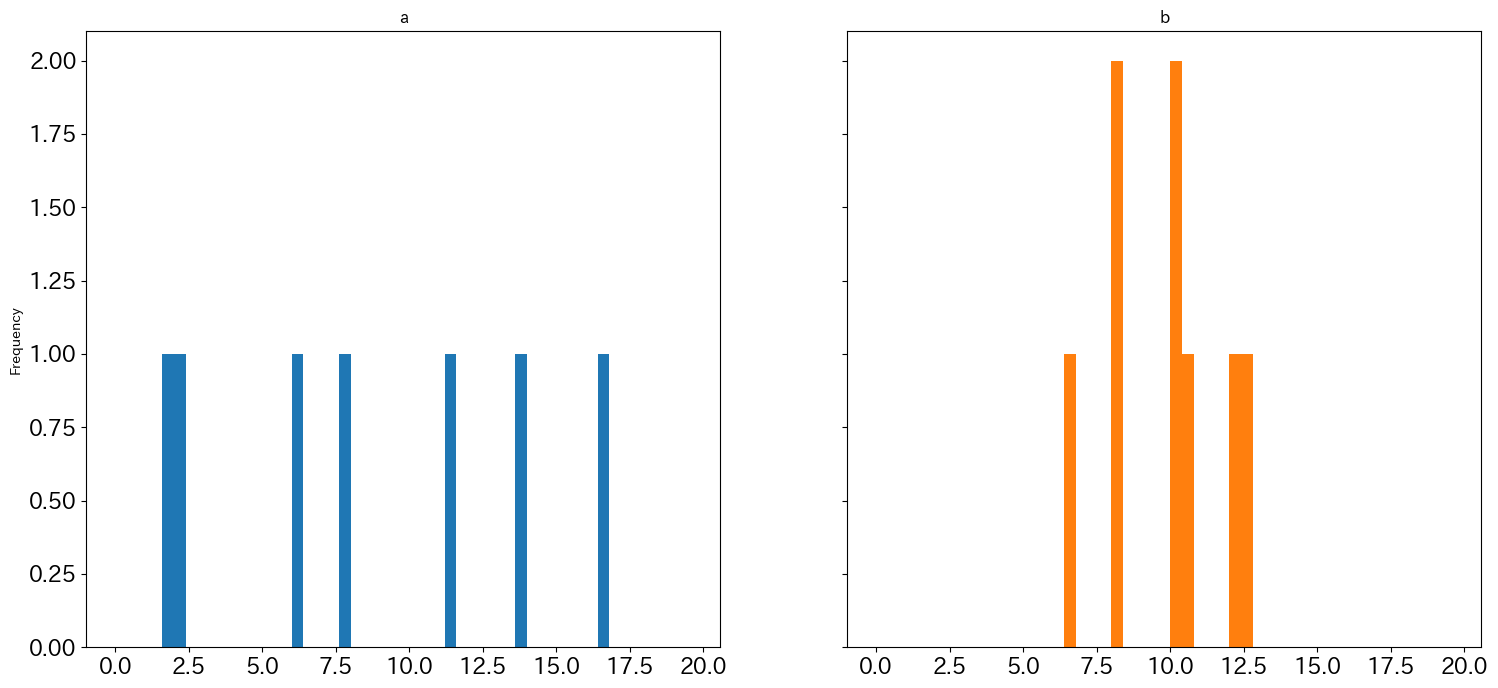

In [63]:
# ヒストグラムの描画
df.plot(kind='hist',subplots=True,layout=(1,2),bins=np.arange(0, 20, 0.4),sharex=True,sharey=True,figsize=(18,8),fontsize=16,legend=False,title=['a', 'b']);